In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [3]:
image1 = cv2.imread('task1.jpg')
image2 = cv2.imread('task2.jpg')

def draw_custom_keypoints(img, keypoints, color, mode="circle", size=10, thickness=1):
    img_copy = img.copy()
    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])
        if mode == "marker":
            cv2.drawMarker(img_copy, (x, y), color, markerType=cv2.MARKER_STAR, markerSize=size, thickness=thickness)
        elif mode == "circle":
            cv2.circle(img_copy, (x, y), radius=size, color=color, thickness=-1)
    
    return img_copy

# 1

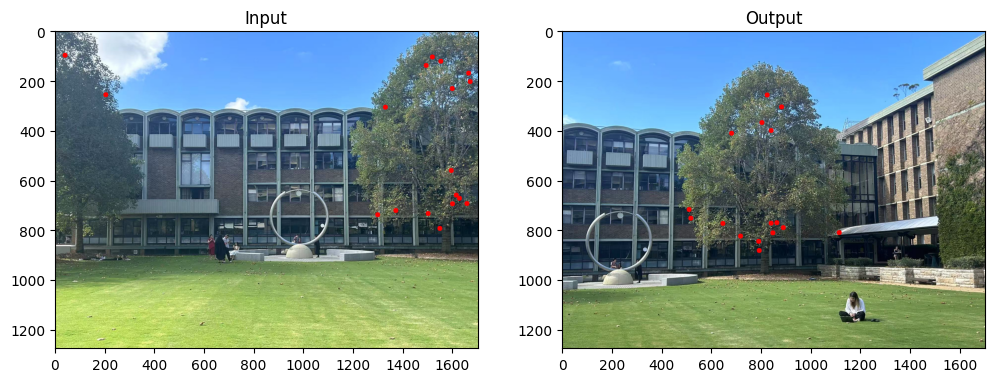

In [7]:
sift = cv2.SIFT_create(nfeatures=27, contrastThreshold=0.1)

keypoints, descriptors = sift.detectAndCompute(image1, None)
img1 = draw_custom_keypoints(image1, keypoints, color=(0, 0, 255), mode="circle", size=10, thickness=2)

keypoints, descriptors = sift.detectAndCompute(image2, None)
img2 = draw_custom_keypoints(image2, keypoints, color=(0, 0, 255), mode="circle", size=10, thickness=2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Output')

plt.show()

In the b) part, I controlled the number of key points extracted by SIFT by adjusting the nfeatures and contrastThreshold parameters. The visibility of significant feature points in the image was improved by setting the nfeatures=28 limit to extract up to 28 key points and lowering the contrastThreshold=0.1 to enhance contrast. Through these optimizations, the key points in Figure 1 are 18, the key points in Figure 2 are 16, and the key features are highlighted.

# 2 #

In [10]:
sift = cv2.SIFT_create(nfeatures=27, contrastThreshold=0.1)
# 保持跟上面的情况一致

## 2 a ##

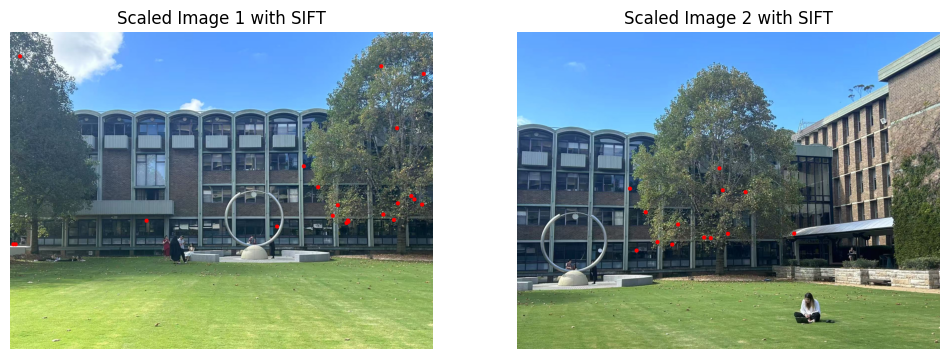

In [12]:
# 1.2x
scaled_image1 = cv2.resize(image1, None, fx=1.2, fy=1.2)
scaled_image2 = cv2.resize(image2, None, fx=1.2, fy=1.2)

keypoints_scaled1, descriptors_scaled1 = sift.detectAndCompute(scaled_image1, None)
keypoints_scaled2, descriptors_scaled2 = sift.detectAndCompute(scaled_image2, None)

scaled_image1_with_keypoints = draw_custom_keypoints(scaled_image1, keypoints_scaled1, color=(0, 0, 255), mode="circle", size=10, thickness=2)
scaled_image2_with_keypoints = draw_custom_keypoints(scaled_image2, keypoints_scaled2, color=(0, 0, 255), mode="circle", size=10, thickness=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(scaled_image1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image 1 with SIFT")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scaled_image2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image 2 with SIFT")
plt.axis('off')

plt.show()

## 2 b ##

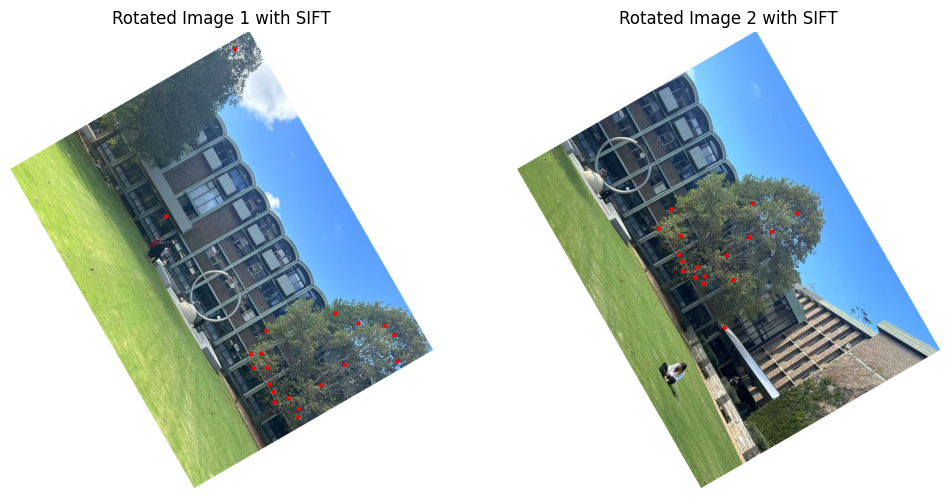

In [16]:
# rotate 60 degree
def rotate_image(img, angle, bg_color=(255, 255, 255)):
    height, width = img.shape[:2]
    center = (width / 2, height / 2)

    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    cos = np.abs(matrix[0, 0])
    sin = np.abs(matrix[0, 1])
    new_width = int((height * sin) + (width * cos))
    new_height = int((height * cos) + (width * sin))
    matrix[0, 2] += (new_width - width) / 2
    matrix[1, 2] += (new_height - height) / 2

    rotated = cv2.warpAffine(img, matrix, 
                             (new_width, new_height), 
                             borderValue=bg_color)

    return rotated

rotated_image1 = rotate_image(image1, -60)
rotated_image2 = rotate_image(image2, -60)

keypoints_rotated1, descriptors_rotated1 = sift.detectAndCompute(rotated_image1, None)
keypoints_rotated2, descriptors_rotated2 = sift.detectAndCompute(rotated_image2, None)

img_rotated1 = draw_custom_keypoints(rotated_image1, keypoints_rotated1, color=(0, 0, 255), mode="circle", size=10, thickness=2)
img_rotated2 = draw_custom_keypoints(rotated_image2, keypoints_rotated2, color=(0, 0, 255), mode="circle", size=10, thickness=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_rotated1, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image 1 with SIFT")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_rotated2, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image 2 with SIFT")
plt.axis('off')

plt.show()


## 2 c ##

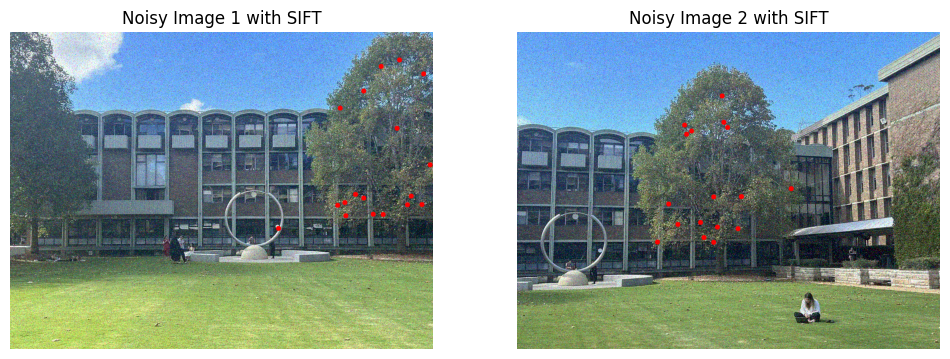

In [19]:
# add noise
noisy_image1 = random_noise(image1, mode='s&p', amount=0.1)
noisy_image1 = np.uint8(noisy_image1 * 255)

noisy_image2 = random_noise(image2, mode='s&p', amount=0.1)
noisy_image2 = np.uint8(noisy_image2 * 255)

keypoints_noisy1, descriptors_noisy1 = sift.detectAndCompute(noisy_image1, None)
keypoints_noisy2, descriptors_noisy2 = sift.detectAndCompute(noisy_image2, None)

img_noisy1 = draw_custom_keypoints(noisy_image1, keypoints_noisy1, color=(0, 0, 255), mode="circle", size=10, thickness=2)
img_noisy2 = draw_custom_keypoints(noisy_image2, keypoints_noisy2, color=(0, 0, 255), mode="circle", size=10, thickness=2)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_noisy1, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image 1 with SIFT")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_noisy2, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image 2 with SIFT")
plt.axis('off')

plt.show()


Through observation, I found that after a 60° rotation, the distribution of key points remained almost unchanged, indicating that SIFT performs quite stably under rotational transformations. After a 1.2× scaling, most key points remained unchanged, but excessive scaling might affect the detection of some key points. In contrast, adding salt-and-pepper noise caused significant disturbances in the distribution of key points, leading to the loss of some original key points and the addition of some erroneous ones. Therefore, SIFT is the most reliable under rotational transformations but is more susceptible to noise interference.

# 3 #

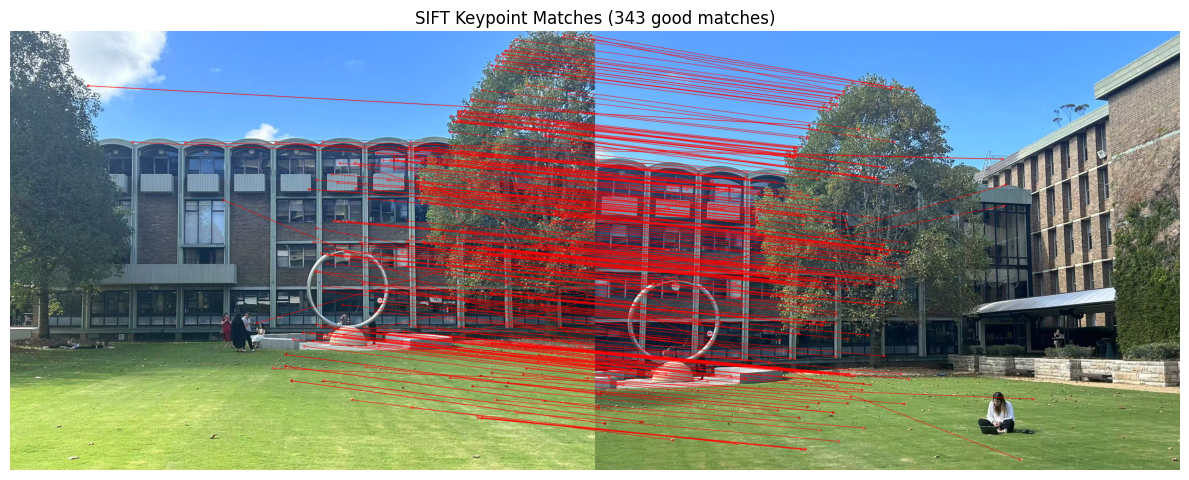

In [22]:
# 转换为灰度图
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create(contrastThreshold=0.1)
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

img_matches_combined = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, good_matches, None,
    matchColor=(0, 0, 255),
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_matches_combined, cv2.COLOR_BGR2RGB))
plt.title(f"SIFT Keypoint Matches ({len(good_matches)} good matches)")
plt.axis('off')
plt.tight_layout()
plt.show()


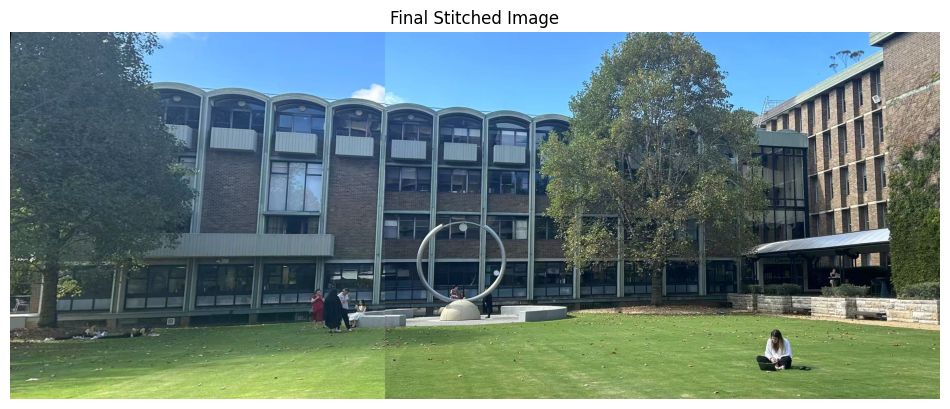

In [23]:
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)  # 以右图为基准

height1, width1 = image1.shape[:2]
height2, width2 = image2.shape[:2]

corners = np.float32([[0, 0], [0, height1], [width1, height1], [width1, 0]]).reshape(-1, 1, 2)
transformed_corners = cv2.perspectiveTransform(corners, H)

min_x = min(0, np.min(transformed_corners[:, :, 0]))
min_y = min(0, np.min(transformed_corners[:, :, 1]))
max_x = max(width2, np.max(transformed_corners[:, :, 0]))
max_y = max(height2, np.max(transformed_corners[:, :, 1]))

translation_matrix = np.array([[1, 0, -min_x], 
                               [0, 1, -min_y], 
                               [0, 0, 1]])

H_translation = np.dot(translation_matrix, H)

# 透视变换
stitched_image = cv2.warpPerspective(image1, H_translation, (int(max_x - min_x), int(max_y - min_y)))

x_offset = -int(min_x)
y_offset = -int(min_y)
stitched_image[y_offset:y_offset+height2, x_offset:x_offset+width2] = image2

cropped_image = stitched_image[300:1400, 110:2900] 

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Final Stitched Image")
plt.show()